# Fundamentals

Import modules:

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

##  What is a Graph?

**Definition**: A graph $G$ consists of a collection $V$ of vertices and a collection of links $E$, for which we denote $G = (V, E)$. 
Each link $e$ is said to connect two vertices, which are called its endpoints. If $e$ connects $u, v \in V$, we write $e = \langle u, v \rangle$. In this case, the vertices $u$ and $v$ are called adjacent.

In [2]:
G = nx.Graph()
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (1,2), (2,3), (3,4), (1,3)] 
G.add_nodes_from(node_labels)
G.add_edges_from(edge_labels)

In [3]:
pos = nx.layout.circular_layout(G)

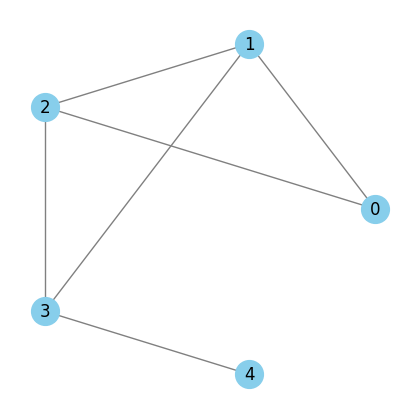

In [4]:
plt.figure(figsize=(4, 4), facecolor='w')
nx.draw(G, pos, with_labels=True, node_size=400, node_color='skyblue', edge_color='gray')
plt.axis('off')
plt.show()

The complement of a graph $G$, denoted as $\overline{G}$ is the graph obtained by removing all links and connecting exactly those vertices that are not adjacent in $G$.

Of course, if we take a graph $G$ and its complement $\overline{G}$ and join them, we obtain a complete graph.


In [5]:
Gc = nx.complement(G)

(-0.9989638474274827,
 1.1899467909320232,
 -1.150778381847691,
 1.1507784414523377)

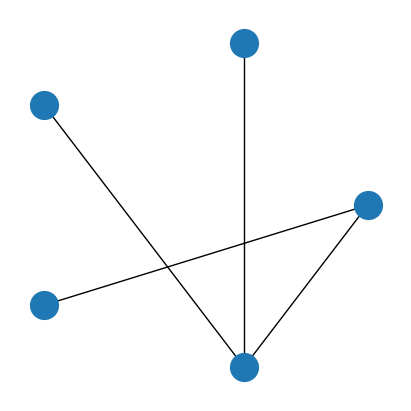

In [6]:
fig, axs = plt.subplots(figsize=(4,4), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
nx.draw_networkx_nodes(Gc, pos, linewidths=1, ax=axs, node_size=400)
nx.draw_networkx_edges(Gc, pos, width=1, ax=axs)
axs.axis('off')

## Subgraphs

**Definition**: A subgraph $G$ is a graph $H$ with $V(H) \subseteq V(G)$ and $E(H) \subseteq E(G)$. 

The subgraph of $G = (V,E)$ induced by $V' \subseteq V $, defined as $G[V']$, is a graph such that $(V', \{(n_i,n_j) | (n_i, n_j) \in E \land (n_i, n_j) \in V'\})$.

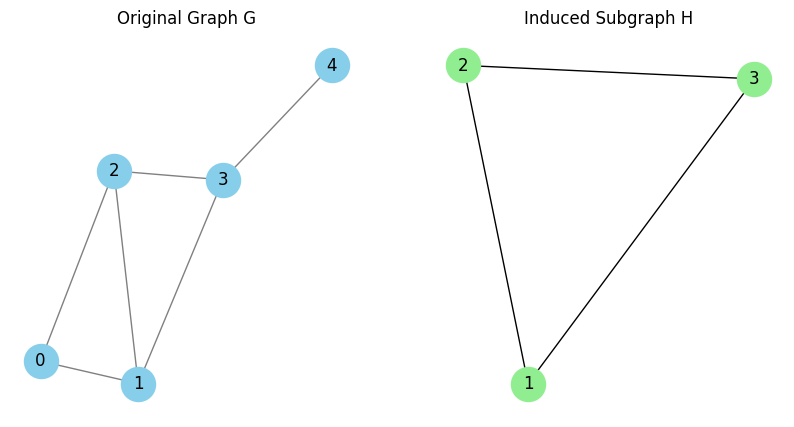

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the original graph G
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (1, 3)])

# Define a subset of nodes for the induced subgraph
subset_nodes = [1, 2, 3]

# Create the induced subgraph H from G
H = G.subgraph(subset_nodes)

# Use a consistent layout for both graphs
pos = nx.spring_layout(G, seed=42)

# Plot both graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot original graph G
nx.draw(G, pos, with_labels=True, ax=axs[0],
        node_color='skyblue', edge_color='gray', node_size=600)
axs[0].set_title("Original Graph G")
axs[0].axis('off')  # Hide axis ticks and borders

# Plot induced subgraph H
nx.draw(H, pos, with_labels=True, ax=axs[1],
        node_color='lightgreen', edge_color='black', node_size=600)
axs[1].set_title("Induced Subgraph H")
axs[1].axis('off')  # Hide axis ticks and borders

plt.show()


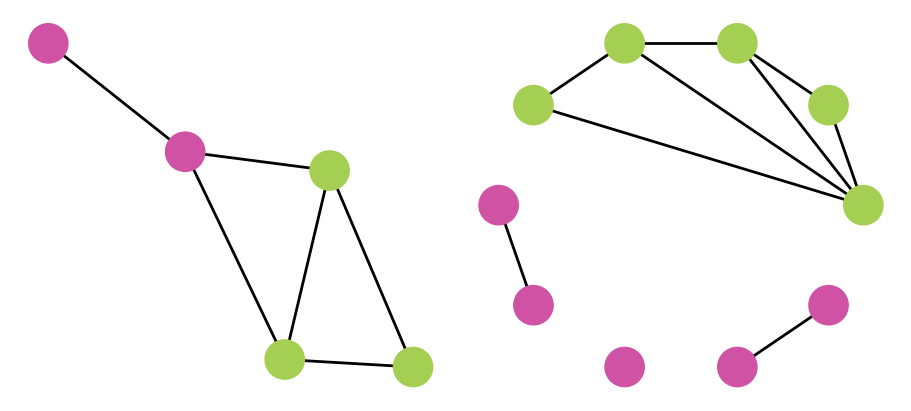

In [8]:
pos = nx.layout.spectral_layout(G)
pos = nx.spring_layout(G, pos=pos, iterations=20, seed=0)

pos2 = nx.layout.circular_layout(G2)

l_colors = ["#a5cf52", "#a5cf52", "#a5cf52", "#cf52a5", "#cf52a5", ]
l_colors2 = ["#a5cf52", "#a5cf52", "#a5cf52", "#a5cf52", "#a5cf52", "#cf52a5",
  "#cf52a5", "#cf52a5", "#cf52a5", "#cf52a5" ]

fig, axs = plt.subplots(figsize=(9,4), facecolor='w', nrows=1, ncols=2, constrained_layout=True)
nx.draw_networkx_nodes(G, pos, node_color=l_colors, linewidths=1, ax=axs[0], node_size=800)
nx.draw_networkx_edges(G, pos, width=2, ax=axs[0])
axs[0].axis('off')

nx.draw_networkx_nodes(G2, pos2, node_color=l_colors2, linewidths=1, ax=axs[1], node_size=800)
nx.draw_networkx_edges(G2, pos2, width=2, ax=axs[1])
_ = axs[1].axis('off')

## Graph representations and data structures

There are different ways to represent a graph. Perhaps the most common is to use an *adjacency matrix*.
Consider a graph $G$ with $n$ vertices and $m$ links. Its adjacency matrix is a matrix $A$ with $n$ columns and $n$ rows with entries $A[i, j]$ denoting the number of links connected by vertices $v_i$ and $v_j$. 

What properties can we see from this example?

An adjacency matrix is *symmetric*, if for all $i$ and $j$, $A[i,j] = A[j,i]$. This property reflects the fact that a link is represented as an unordered pair of vertices (i.e., $e = \langle v_i, v_j \rangle = \langle v_j, v_i \rangle$).
2. A graph $G$ is simple if and only if for each $i$ and $j$, $A[i,j] \leq$ and $A[i,i] = 0$. In other words, there can be at least one link connecting vertices $v_i$ and $v_j$ and, in particular, no link connects to a vertex by itself.

As an alternative, we can also use the *incidence matrix* of a graph as its representation. An incidence matrix $M$ of graph $G$ consists of $n$ rows and $m$ columns such that $M[i,j]$ counts the number of times the link $e_j$ is incident to vertex $v_i$.

In [8]:
# Define a simple undirected graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (1, 3)])

# Get adjacency matrix as NumPy array
A = nx.to_numpy_array(G, dtype=int)
print("Adjacency Matrix:\n", A)

Adjacency Matrix:
 [[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]


In [9]:
def incidence_matrix(G):
    nodes = list(G.nodes())
    edges = list(G.edges())
    mat = np.zeros((len(nodes), len(edges)), dtype=int)

    for j, (u, v) in enumerate(edges):
        i_u = nodes.index(u)
        i_v = nodes.index(v)
        mat[i_u, j] = 1
        mat[i_v, j] = 1
    return mat

M = incidence_matrix(G)
print("Incidence Matrix:\n", M)

Incidence Matrix:
 [[1 1 0 0 0 0]
 [1 0 1 1 0 0]
 [0 1 1 0 1 0]
 [0 0 0 1 1 1]
 [0 0 0 0 0 1]]


## 📚 Further Reading

If you want more control over layout, labels, and LaTeX-style formatting, refer to the following extended version, which includes:

- Custom edge and node labels
- Graph drawing alongside matrix visualization
- Use of `draw_networkx_edge_labels` and `draw_networkx_labels`
- LaTeX-style labels for publication-quality figures

In [9]:
def draw_graph_and_adjmatrix(G, node_labels, edge_labels):
  pos = nx.layout.spectral_layout(G)
  pos = nx.spring_layout(G, pos=pos, iterations=20, seed=0)

  fig, axs = plt.subplots(figsize=(7,3), facecolor='w', nrows=1, ncols=2, constrained_layout=True)
  nx.draw_networkx_nodes(G, pos, node_color="#cf52a5", linewidths=1, ax=axs[0], node_size=800)
  nx.draw_networkx_edges(G, pos, width=2, ax=axs[0])
  nx.draw_networkx_labels(G, pos, labels=node_labels, ax=axs[0], font_size=14)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=axs[0], font_size=16)
  axs[0].axis('off')

  A = nx.adjacency_matrix(G)
  axs[1].imshow(A.todense(), cmap='Greys_r')
  axs[1].set_xticks(range(len(node_labels))); 
  axs[1].set_yticks(range(len(node_labels))); 
  axs[1].set_xticklabels(node_labels.values(), fontsize=14); 
  axs[1].set_yticklabels(node_labels.values(), fontsize=14);
  print (node_labels.values())
  axs[1].axis('on')

In [10]:
def example_graph_formalities(node_labels, edge_labels):
  G = nx.Graph()
  G.add_nodes_from(node_labels)
  G.add_edges_from(edge_labels)
  draw_graph_and_adjmatrix(
      G=G, node_labels=dict({i:"$v_%i$" % i for i in node_labels }), #{1:"$v_1$", 2 :"$v_2$", 3:"$v_3$", 4:"$v_4$"}, 
      edge_labels=dict({(edge_labels[i][0], edge_labels[i][1]) : ("$e_%i$" % i) for i in range(len(edge_labels))})
  )

In [11]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (3,4), (1,3)]

In [12]:
dict({(edge_labels[i][0], edge_labels[i][1]) : ("$e_%i$" % i) for i in range(len(edge_labels))})

{(0, 1): '$e_0$',
 (0, 2): '$e_1$',
 (1, 2): '$e_2$',
 (2, 3): '$e_3$',
 (3, 4): '$e_4$',
 (1, 3): '$e_5$'}

### Adjacency matrix

dict_values(['$v_0$', '$v_1$', '$v_2$', '$v_3$', '$v_4$'])


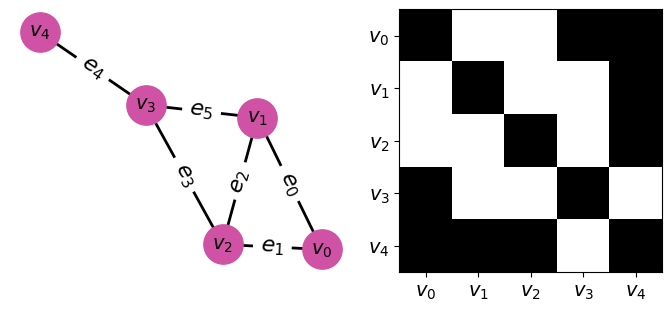

In [13]:
example_graph_formalities(node_labels, edge_labels)

### Incidence matrix

In [14]:
def get_incidence_matrix(node_labels, edge_labels):
  M = len(edge_labels)
  N = len(node_labels)
  mat = np.zeros(shape=(N,M), dtype=np.int8)
  for i in range(M):
    mat[edge_labels[i][0], i] += 1
    mat[edge_labels[i][1], i] += 1
  return mat

get_incidence_matrix(node_labels=node_labels, edge_labels=edge_labels)

array([[1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0]], dtype=int8)

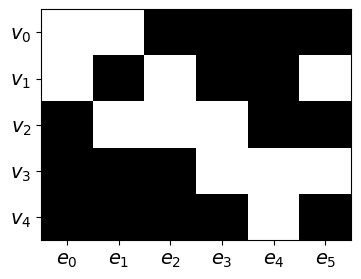

In [15]:
fig, axs = plt.subplots(figsize=(4,3), facecolor='w', nrows=1, ncols=1)
axs.imshow(get_incidence_matrix(node_labels=node_labels, edge_labels=edge_labels), cmap='Greys_r', aspect='auto')
axs.set_yticks(node_labels); 
axs.set_yticklabels(dict({i:"$v_%i$" % i for i in node_labels }).values(), fontsize=14)
axs.set_xticks(range(len(edge_labels)))
axs.set_xticklabels(dict({(edge_labels[i][0], edge_labels[i][1]) : ("$e_%i$" % i) for i in range(len(edge_labels))}).values(), fontsize=14); 

###  List of edges



$(\langle v_0, v_1 \rangle, \langle v_0, v_2 \rangle, \langle v_1, v_2 \rangle, \langle v_2, v_3 \rangle, \langle v_3, v_4 \rangle, \langle v_1, v_3 \rangle)$ 

---